# <center>  Exploratory data analysis with Pandas


**For this task I will be Pandas to answer a few questions about the Adult dataset.**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [33]:
#Import Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set default plot size and dark style.
plt.rcParams["figure.figsize"] = (20, 10)
#sns.set_style("dark")


In [34]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [35]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (*age* feature) of women?**

In [36]:
data[data['sex']=='Female']['age'].mean()

36.85823043357163

**3. What is the percentage of German citizens (*native-country* feature)?**

In [37]:
float(data[data['native-country']=='Germany']['native-country'].count()/data['native-country'].count())*100

0.42074874850281013

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year? **

In [38]:
print('Age measures for income less than 50K\n',data[data['salary']=='<=50K']['age'].agg([np.mean,np.std]),'\n')
print('Age measures for income more than 50K\n',data[data['salary']=='>50K']['age'].agg([np.mean,np.std]))

Age measures for income less than 50K
 mean    36.783738
std     14.020088
Name: age, dtype: float64 

Age measures for income more than 50K
 mean    44.249841
std     10.519028
Name: age, dtype: float64


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [39]:
pd.crosstab(data['salary'],data['education'],margins=True)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904,24720
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [40]:
pd.crosstab(data['salary'],data['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


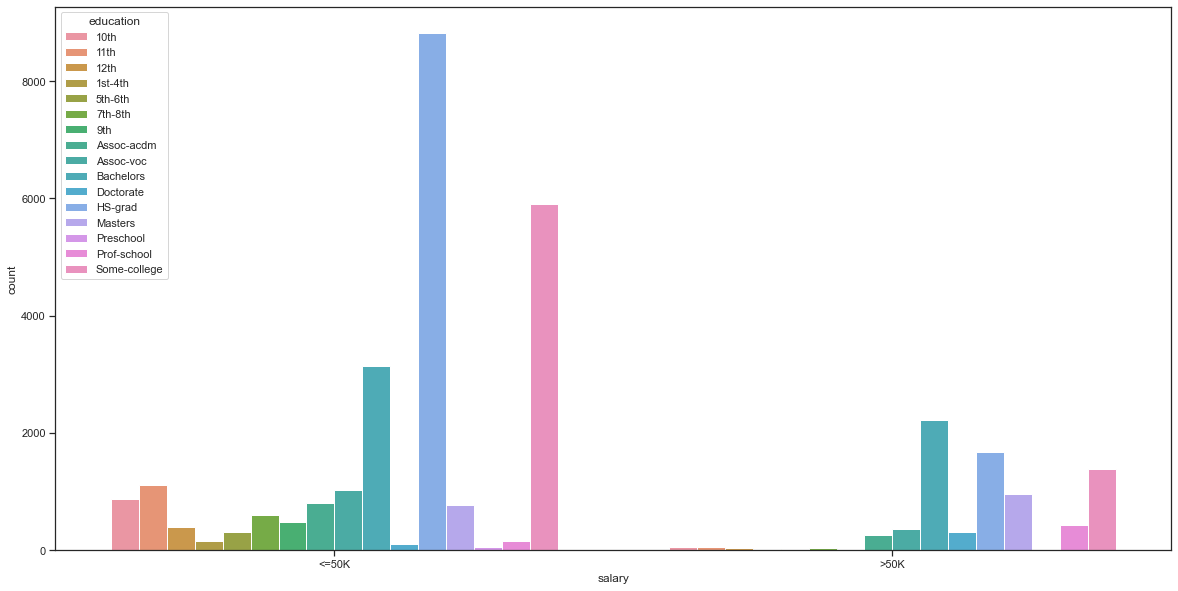

In [41]:
sns.countplot(data['salary'],hue=data['education'].sort_values())
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


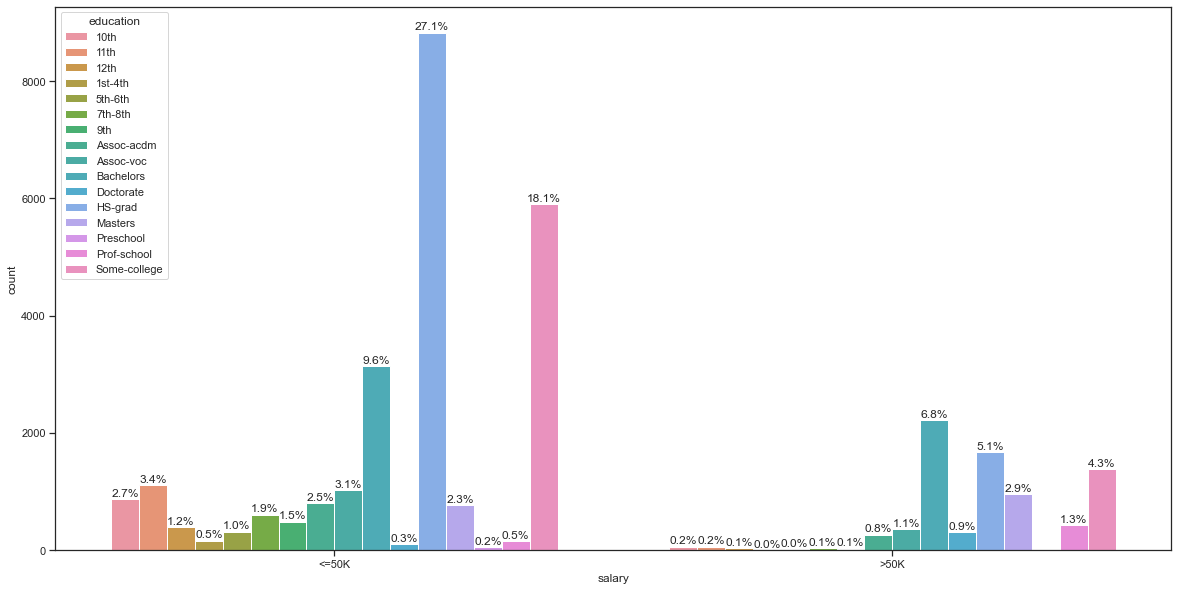

In [42]:
ax=sns.countplot(data['salary'],hue=data['education'].sort_values())
total=data.shape[0]
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [43]:
#Below table shows us the age statistics for each race and gender.

data.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [44]:
#Another Solution
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [45]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [46]:
#We can see from our code below that the people who are married have a higher proportion of those who earn a lot greater.

count_married=0
count_single=0
for status in data[(data['salary']=='>50K') & (data['sex'] == 'Male')]['marital-status']:
    if status.split('-')[0] =='Married':
        count_married+=1
    else:
        count_single+=1

print(f'Number of married: {count_married}\nNumber of single: {count_single}')


Number of married: 5965
Number of single: 697


**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [47]:
a=data['hours-per-week'].value_counts().sort_index(ascending=False)
person_max_hours=a.filter([a.index.max()],axis=0)
max_hours=person_max_hours.index.values[0]
num_of_people=person_max_hours.values[0]

print(f"max number of hours= {max_hours}\nNumber of people working these hours= {num_of_people}")

max number of hours= 99
Number of people working these hours= 85


In [48]:
totalPeople=data[(data['hours-per-week']==max_hours)].shape[0]
totalPeople_earn_alot=data[(data['hours-per-week']==max_hours)&(data['salary']=='>50K') ].shape[0]

percentage_people_earnAlot= round((totalPeople_earn_alot/totalPeople) * 100,1)
print(f"The percentage of those who earn a lot (>50K) is = {percentage_people_earnAlot}%")

The percentage of those who earn a lot (>50K) is = 29.4%


**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [49]:
# You code here

df =data.groupby(['native-country','salary']).mean()

for (country, salary), sub_df in data.groupby(['native-country','salary']):
    print("Race: {0}, sex: {1}".format(country, salary))
    print(sub_df['hours-per-week'].mean())


Race: ?, sex: <=50K
40.16475972540046
Race: ?, sex: >50K
45.54794520547945
Race: Cambodia, sex: <=50K
41.416666666666664
Race: Cambodia, sex: >50K
40.0
Race: Canada, sex: <=50K
37.91463414634146
Race: Canada, sex: >50K
45.64102564102564
Race: China, sex: <=50K
37.38181818181818
Race: China, sex: >50K
38.9
Race: Columbia, sex: <=50K
38.68421052631579
Race: Columbia, sex: >50K
50.0
Race: Cuba, sex: <=50K
37.98571428571429
Race: Cuba, sex: >50K
42.44
Race: Dominican-Republic, sex: <=50K
42.338235294117645
Race: Dominican-Republic, sex: >50K
47.0
Race: Ecuador, sex: <=50K
38.041666666666664
Race: Ecuador, sex: >50K
48.75
Race: El-Salvador, sex: <=50K
36.03092783505155
Race: El-Salvador, sex: >50K
45.0
Race: England, sex: <=50K
40.483333333333334
Race: England, sex: >50K
44.53333333333333
Race: France, sex: <=50K
41.05882352941177
Race: France, sex: >50K
50.75
Race: Germany, sex: <=50K
39.13978494623656
Race: Germany, sex: >50K
44.97727272727273
Race: Greece, sex: <=50K
41.80952380952381
Ra

In [50]:
#Another Solution

pd.crosstab(data['native-country'], data['salary'],values=data['hours-per-week'], aggfunc=np.mean).transpose()

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


In [51]:
#Japan Values

pd.crosstab(data['native-country'], data['salary'],values=data['hours-per-week'], aggfunc=np.mean).transpose()['Japan']

salary
<=50K    41.000000
>50K     47.958333
Name: Japan, dtype: float64

In [52]:
#Another Solution

pd.crosstab(data['native-country'], data['salary'],values=data['hours-per-week'], aggfunc=np.mean).transpose()

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,...,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,...,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


In [53]:
hours_per_CountrySalary=pd.crosstab(data['native-country'], data['salary'],values=data['hours-per-week'], aggfunc=np.mean).transpose()

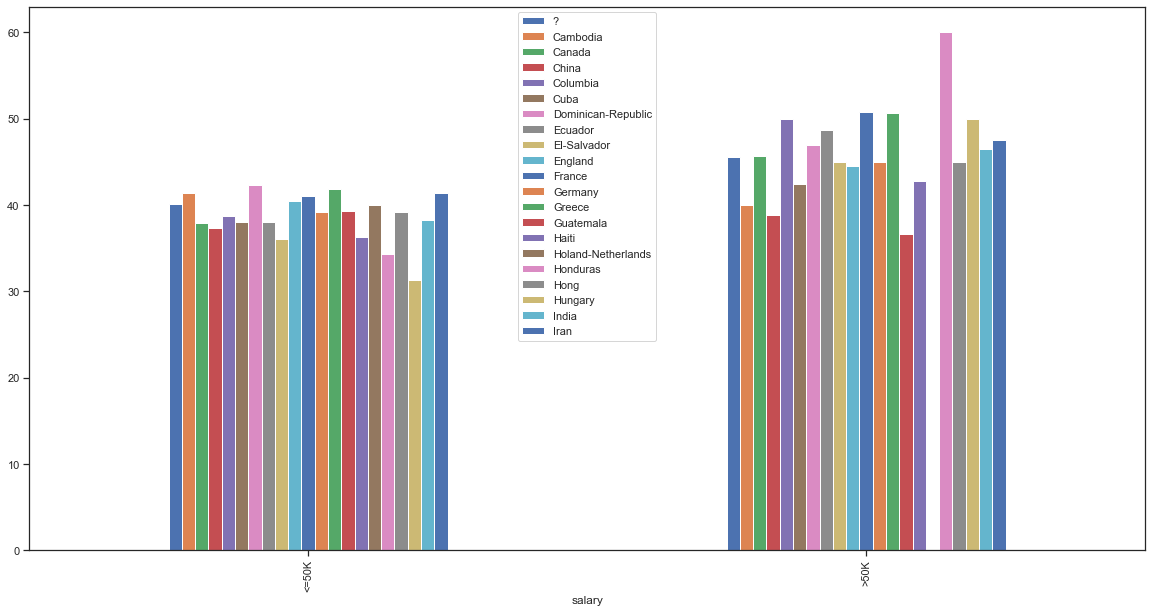

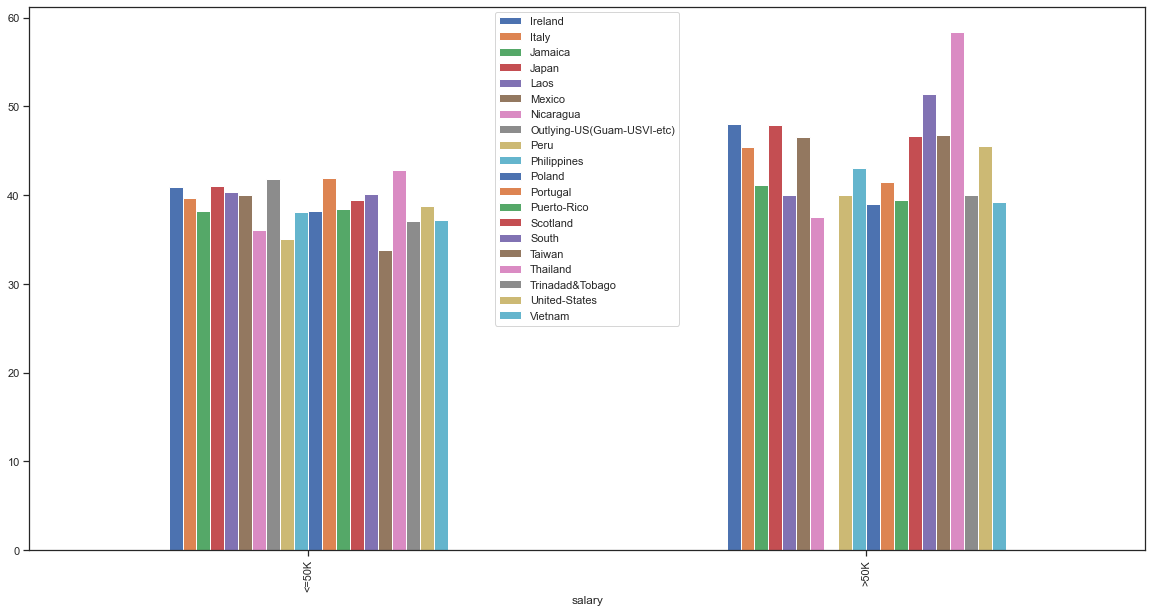

In [54]:
#Plotting the average hours worked per country for people making less than 50K and more than 50K
#Two plots are used to show the information for all countries, as one plot would be to crowded for all the countries.

col=hours_per_CountrySalary.columns
hours_per_CountrySalary[col[0:int(len(hours_per_CountrySalary.columns)/2)]].plot.bar()
plt.legend(loc='upper center')
plt.show()

col=hours_per_CountrySalary.columns
hours_per_CountrySalary[col[int(len(hours_per_CountrySalary.columns)/2):int(len(hours_per_CountrySalary.columns)-1)]].plot.bar()
plt.legend(loc='upper center')
plt.show()

In [55]:
#all available countries

hours_per_CountrySalary.columns

Index(['?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France',
       'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands',
       'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua',
       'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand',
       'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'],
      dtype='object', name='native-country')

In [56]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:>

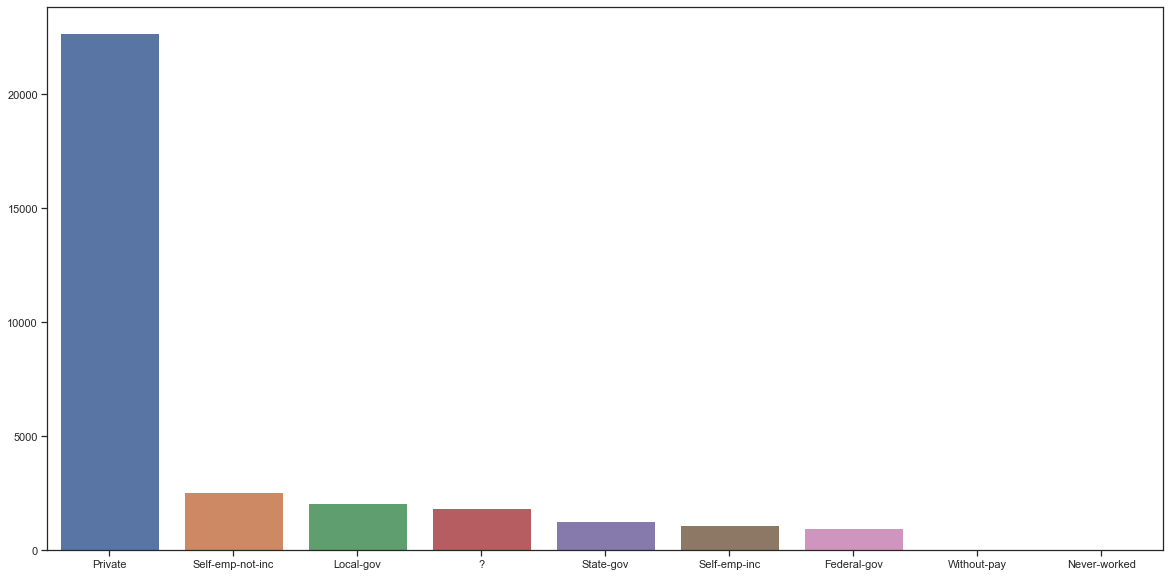

In [57]:
# We can see that the highest count for working class is Private.

a=data['workclass'].value_counts()
sns.barplot(x=a.index,y=a.values)

In [58]:
#Testing to see if there are any correlated variables

data.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

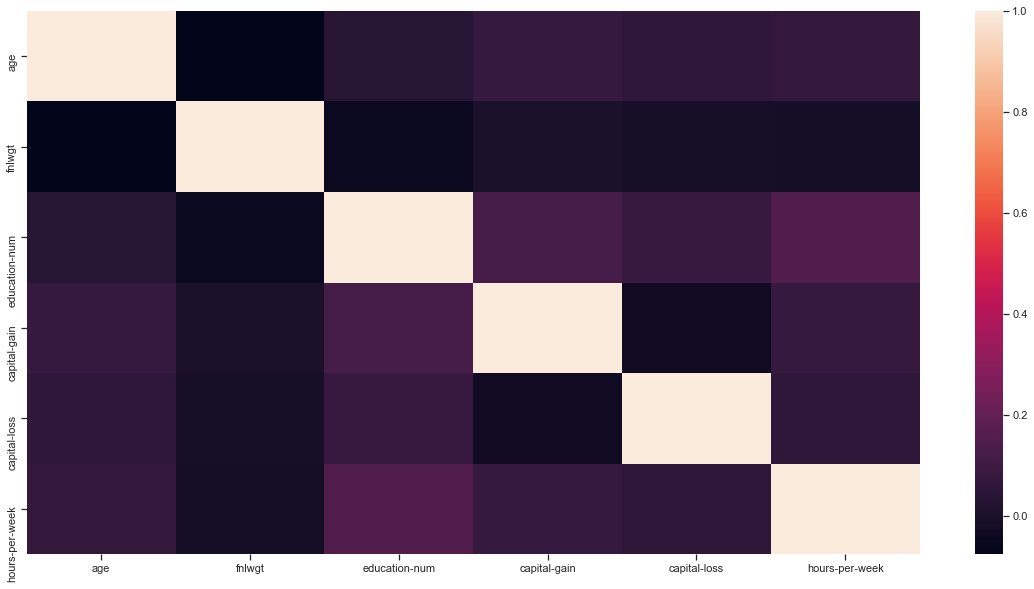

In [59]:
# we can see that there is no evidence of correlation between data variables.
sns.set(style="ticks", color_codes=True)
sns.heatmap(data.corr())

<Figure size 720x504 with 0 Axes>

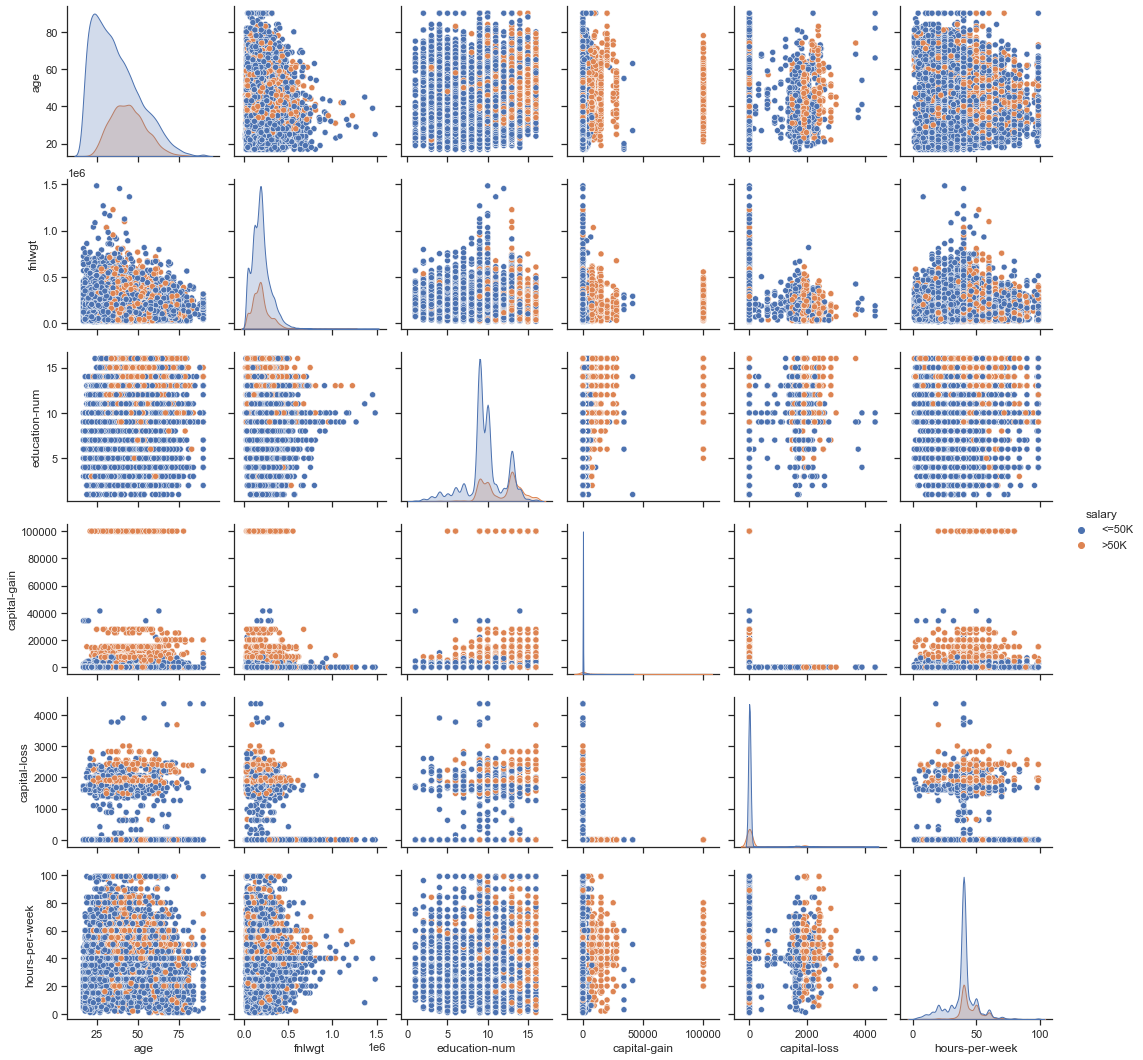

In [60]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(10,7))
sns.pairplot(data,hue='salary')